In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import ConnectionPatch
from matplotlib import gridspec

In [2]:
#### Information needed for graphs 

# 1a) Pie Graph: 
# Calc CSI and find percent of time in each quadrant 

# 1b) Total Sum 
# Total sum of returns for each of SPY and TLT during each Quadrant 

# 1c) 
# SQN and SUM for each sector SPDR

# 2a) 
# Standard deviation of daily returns for SPY during each Quadrant
# Avg Imp Volatility for SPY during each Quadrant 

# 2b)
# Avg Imp Volatility for SPY for each increment of CSI 

# 3
# Graph CSI

In [3]:
csi_data = pd.read_csv('csi_data.csv', index_col = 0)
csi_data

,csi1,csi2,quadrant,SPY,TLT,XLK,XLI,XLY,XLF,XLB,XLE,XLP,XLU,XLRE,XLV,XRT,SPY_IV
date,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
2000-01-04,NaN,NaN,0,-0.039123,NaN,-0.050685,-0.027393,-0.030202,-0.043595,-0.009626,-0.018825,-0.028132,-0.029872,NaN,-0.022772,NaN,NaN
2000-01-05,NaN,NaN,0,0.001789,NaN,-0.015010,-0.004635,-0.012320,-0.007878,0.041213,0.026477,0.017639,0.025160,NaN,-0.009119,NaN,NaN
2000-01-06,NaN,NaN,0,-0.016071,NaN,-0.032986,0.013610,0.011435,0.043676,0.025765,0.038505,0.018667,-0.001832,NaN,0.003408,NaN,NaN
2000-01-07,NaN,NaN,0,0.058076,NaN,0.017355,0.038163,0.046934,0.016848,-0.000728,0.010799,0.063700,0.008440,NaN,0.012228,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-24,3.961808,4.568680,Q2,-0.006440,-0.000059,-0.012114,-0.008009,0.001774,-0.002466,-0.003405,-0.005567,-0.001286,-0.006592,-0.004007,-0.011010,-0.010504,NaN
2020-07-27,3.699078,4.276083,Q2,0.007292,-0.003712,0.015780,0.004176,0.006198,-0.008241,0.014479,0.000800,0.004990,-0.012110,0.011782,0.007517,0.011048,NaN
2020-07-28,3.035161,3.669275,Q2,-0.006342,0.006919,-0.011698,-0.006931,-0.009899,-0.002493,-0.021969,-0.017581,0.003684,0.015113,0.020165,-0.001133,-0.003214,NaN


In [4]:
csi_data.iloc[-500:].head()

,csi1,csi2,quadrant,SPY,TLT,XLK,XLI,XLY,XLF,XLB,XLE,XLP,XLU,XLRE,XLV,XRT,SPY_IV
date,,,,,,,,,,,,,,,,,
2018-08-06,-0.524404,-0.525644,Q4,0.003667,0.000587,0.005363,0.001450,0.006705,0.005334,-0.000337,0.003721,0.000921,0.000750,-0.002087,0.001782,0.006001,0.173400
2018-08-07,-0.191627,-0.358756,Q4,0.003302,-0.005197,0.003830,0.007109,0.004618,0.004599,0.003374,0.007415,-0.006073,-0.001500,-0.002091,0.000111,0.008352,0.172767
2018-08-08,0.259447,-0.153545,Q1,-0.000420,0.001011,0.002725,-0.004444,0.001061,0.002465,-0.004204,-0.007229,-0.007591,-0.005257,-0.006287,0.001556,0.000592,0.173200
2018-08-09,0.569796,-0.210157,Q1,-0.001366,0.008418,0.000408,-0.005515,0.003709,-0.005971,0.005404,-0.009268,-0.002985,0.004530,0.001808,-0.001110,0.004336,0.171133
2018-08-10,0.497892,-0.397208,Q1,-0.006700,0.007263,-0.008014,-0.008846,-0.008358,-0.011661,-0.014444,0.006147,-0.003743,-0.004322,-0.009624,-0.004332,0.000589,0.175133


In [5]:
csi_data.iloc[-500:].tail()

,csi1,csi2,quadrant,SPY,TLT,XLK,XLI,XLY,XLF,XLB,XLE,XLP,XLU,XLRE,XLV,XRT,SPY_IV
date,,,,,,,,,,,,,,,,,
2020-07-24,3.961808,4.568680,Q2,-0.006440,-0.000059,-0.012114,-0.008009,0.001774,-0.002466,-0.003405,-0.005567,-0.001286,-0.006592,-0.004007,-0.011010,-0.010504,NaN
2020-07-27,3.699078,4.276083,Q2,0.007292,-0.003712,0.015780,0.004176,0.006198,-0.008241,0.014479,0.000800,0.004990,-0.012110,0.011782,0.007517,0.011048,NaN
2020-07-28,3.035161,3.669275,Q2,-0.006342,0.006919,-0.011698,-0.006931,-0.009899,-0.002493,-0.021969,-0.017581,0.003684,0.015113,0.020165,-0.001133,-0.003214,NaN
2020-07-29,2.705235,3.401713,Q2,0.012299,-0.001703,0.014487,0.015215,0.010146,0.018742,0.008198,0.021692,0.001436,0.004632,0.018931,0.010494,0.028375,NaN
2020-07-30,2.389774,3.087986,Q2,-0.003568,0.006589,0.005600,-0.010037,-0.000806,-0.017989,-0.019353,-0.039278,0.000000,0.000000,-0.008197,-0.006924,-0.003972,NaN


In [6]:
csi_data.iloc[-500:].quadrant.unique()

array(['Q4', 'Q1', 'Q3', 'Q2'], dtype=object)

In [7]:
# 1b & 1c - Calculate sum of returns for each index and sector
spdrs = ['XLK', 'XLI', 'XLY', 'XLF', 'XLB', 'XLE', 'XLP', 'XLU', 'XLRE', 'XLV', 'XRT']
indexes = ['SPY', 'TLT']
quadrants = ['Q1', 'Q2', 'Q3', 'Q4']

df_sum_of_returns = pd.DataFrame()
    
for quad in quadrants:
    
    df_temp = csi_data[csi_data['quadrant'] == quad]
    
    for i in indexes:        
        df_sum_of_returns.at[i, quad] = np.nansum(df_temp[i])
        
    for i in spdrs:
        df_sum_of_returns.at[i, quad] = np.nansum(df_temp[i])
        
df_sum_of_returns = df_sum_of_returns *100
df_sum_of_returns

,Q1,Q2,Q3,Q4
SPY,186.666995,-46.886945,-101.345783,124.013061
TLT,-103.043425,91.610016,81.209652,21.947427
XLK,258.900416,-62.967646,-103.945367,155.793212
XLI,250.655706,-78.456195,-158.234569,145.143612
XLY,235.764498,-48.227470,-122.438817,148.317668
XLF,239.009648,-98.682276,-165.402529,136.266090
XLB,251.210872,-108.086546,-135.851444,149.574849
XLE,231.643812,-121.245671,-137.380236,152.306783
XLP,49.490016,35.455000,-0.682121,43.722475
XLU,12.307805,95.763864,6.765537,34.777121


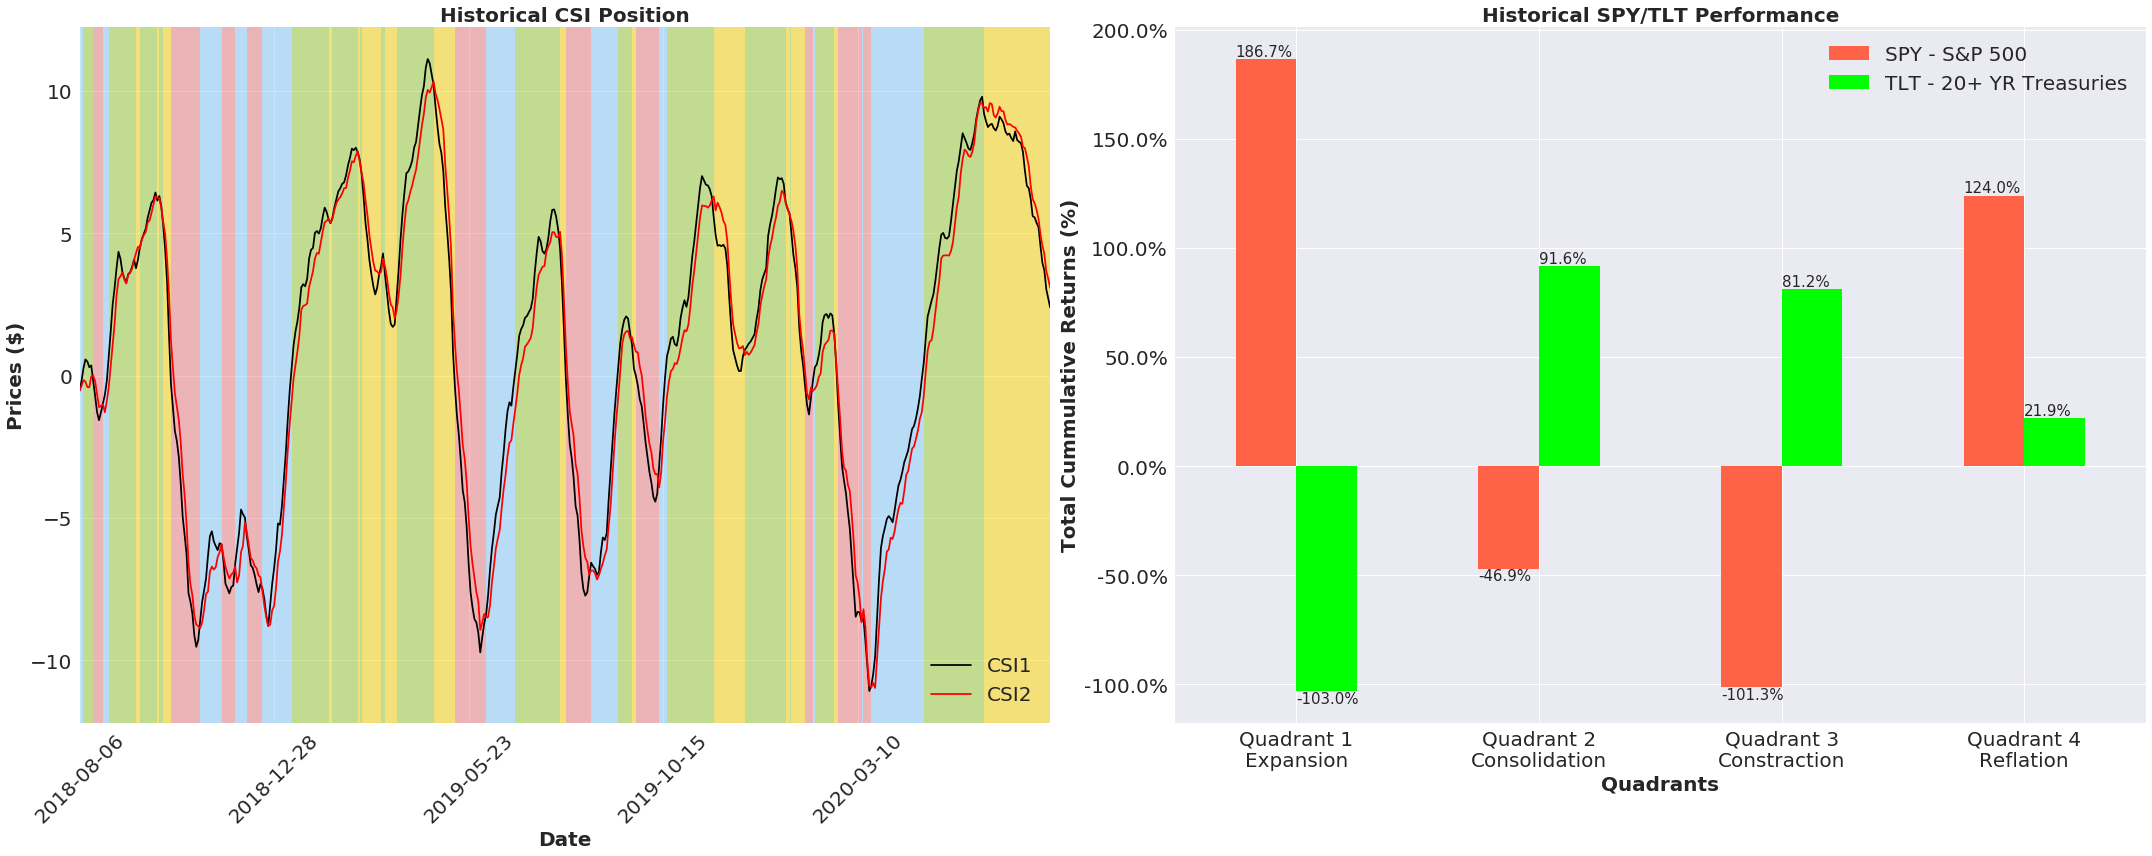

In [8]:
# 3 - CSI: Where are we now?
font_size= 20
ax1_alpha  = 0.5
with plt.style.context(("ggplot", "seaborn")):
    ################# Chart 1 ##############################################
    color_mapping = {"Q1":"yellowgreen", "Q2":"gold", "Q3":"lightcoral", "Q4":"lightskyblue"}
    
    fig = plt.figure(figsize=(30,12))
    ax1 = fig.add_subplot(121)

    csi_data.iloc[-500:][['csi1', 'csi2']].plot(ax=ax1, color=["black", "red"]);

    index = []
    prev = "Q4"
    start,end = 0, 0

    ##################### Logic for Background Colors according to Quads ######################
    for i, row in enumerate(csi_data.iloc[-500:].iterrows()):
        if row[1].quadrant == prev:
            index.append(row[0])
        else:
            end = i
            ax1.axvspan(xmin=start, xmax=end, facecolor=color_mapping[prev], alpha=ax1_alpha)
            start = i
            index= [row[0]]
            prev = row[1]["quadrant"]
    
    if start < csi_data.iloc[-500:].shape[0]:
        ax1.axvspan(xmin=start, xmax=csi_data.iloc[-500:].shape[0], facecolor=color_mapping[prev], alpha=ax1_alpha);

    plt.xlabel("Date", fontsize=font_size, fontweight="bold")
    plt.ylabel("Prices ($)", fontsize=font_size, fontweight="bold")
    plt.xticks(rotation=45, fontsize=font_size)    
    plt.yticks(fontsize=font_size)
    plt.title("Historical CSI Position", fontsize=font_size, fontweight="bold")
    plt.legend(labels=["CSI1", "CSI2"], 
               fontsize = font_size, 
               title = '', title_fontsize = font_size);
    
    ################# Chart 2 ##############################################
    ax2 = fig.add_subplot(122)
    
    df_sum_of_returns.T.loc[["Q1", "Q2", "Q3", "Q4"]].plot.bar(y=["SPY", "TLT"], ax=ax2, color=["tomato", "lime"],);
      
    plt.xlabel("Quadrants", fontsize=font_size, fontweight="bold")    
    plt.xticks([0, 1, 2, 3], 
               ["Quadrant 1\nExpansion", "Quadrant 2\nConsolidation", "Quadrant 3\nConstraction", "Quadrant 4\nReflation"],
               rotation=360, 
               fontsize=font_size)
    
    def percent(x, pos):
        return '%1.1f%%' % (x)
    
    ax2.yaxis.set_major_formatter(FuncFormatter(percent))
    plt.ylabel("Total Cummulative Returns (%)", fontsize=font_size, fontweight="bold")
    plt.yticks(fontsize=font_size)
    
    plt.title("Historical SPY/TLT Performance", fontsize=font_size, fontweight="bold")
    
    handles,labels = ax2.get_legend_handles_labels()
    plt.legend(labels=["SPY - S&P 500", "TLT - 20+ YR Treasuries"], 
               fontsize = font_size, 
               title = '', title_fontsize = font_size);
    
    for p in ax2.patches:
        if p.get_height() > 0:
            ax2.text(p.get_x(), p.get_height(), "%.1f%%"%(p.get_height()), va="bottom", fontsize=15)
        else:
            ax2.text(p.get_x(), p.get_height(), "%.1f%%"%(p.get_height()), va="top", fontsize=15)
            
plt.tight_layout()
plt.savefig("graph1.png")

In [52]:
df_sqn = pd.DataFrame()
sqn = lambda total_occurences, returns: math.sqrt(total_occurences) * np.nanmean(returns) / np.nanstd(returns)

for quad in quadrants:
    
    df_temp = csi_data[csi_data['quadrant'] == quad]
    
    for i in indexes:        
        df_sqn.at[i, quad] = sqn(len(df_temp), df_temp[i])
        
    for i in spdrs:
        df_sqn.at[i, quad] = sqn(len(df_temp), df_temp[i])
        
df_sqn = df_sqn * 100
df_sqn

,Q1,Q2,Q3,Q4
SPY,590.828466,-145.541220,-199.289949,268.010208
TLT,-325.676272,324.710430,259.318977,81.901172
XLK,660.963148,-163.706054,-184.607069,297.957750
XLI,632.822075,-206.543145,-294.034055,299.963162
XLY,617.080611,-131.111191,-225.835148,301.332699
XLF,403.465777,-210.430965,-207.243995,197.700278
XLB,567.442957,-252.746143,-224.989835,272.029662
XLE,428.996054,-247.954890,-186.253820,224.148026
XLP,183.367572,139.136655,-1.831804,140.647385
XLU,35.404072,288.175867,14.344907,74.109266


In [53]:
df_tot_sqn = df_sum_of_returns.join(df_sqn, lsuffix="_total", rsuffix="_sqn")
df_tot_sqn

,Q1_total,Q2_total,Q3_total,Q4_total,Q1_sqn,Q2_sqn,Q3_sqn,Q4_sqn
SPY,186.666995,-46.886945,-101.345783,124.013061,590.828466,-145.541220,-199.289949,268.010208
TLT,-103.043425,91.610016,81.209652,21.947427,-325.676272,324.710430,259.318977,81.901172
XLK,258.900416,-62.967646,-103.945367,155.793212,660.963148,-163.706054,-184.607069,297.957750
XLI,250.655706,-78.456195,-158.234569,145.143612,632.822075,-206.543145,-294.034055,299.963162
XLY,235.764498,-48.227470,-122.438817,148.317668,617.080611,-131.111191,-225.835148,301.332699
XLF,239.009648,-98.682276,-165.402529,136.266090,403.465777,-210.430965,-207.243995,197.700278
XLB,251.210872,-108.086546,-135.851444,149.574849,567.442957,-252.746143,-224.989835,272.029662
XLE,231.643812,-121.245671,-137.380236,152.306783,428.996054,-247.954890,-186.253820,224.148026
XLP,49.490016,35.455000,-0.682121,43.722475,183.367572,139.136655,-1.831804,140.647385
XLU,12.307805,95.763864,6.765537,34.777121,35.404072,288.175867,14.344907,74.109266


In [54]:
etf_key = {
    'SPY' : 'S&P 500',
    'TLT' : '20+ YR Treasures',
    'XLK' : 'Technology',
    'XLI' : 'Industrials',
    'XLY' : 'Consumer Discretionary',
    'XLF' : 'Financials',
    'XLB' : 'Materials',
    'XLE' : 'Energy',
    'XLP' : 'Consumer Staples',
    'XLU' : 'Utilities',
    'XLRE' : 'Real Estate',
    'XLV' : 'Healthcare',
    'XRT' : 'Retail'
}

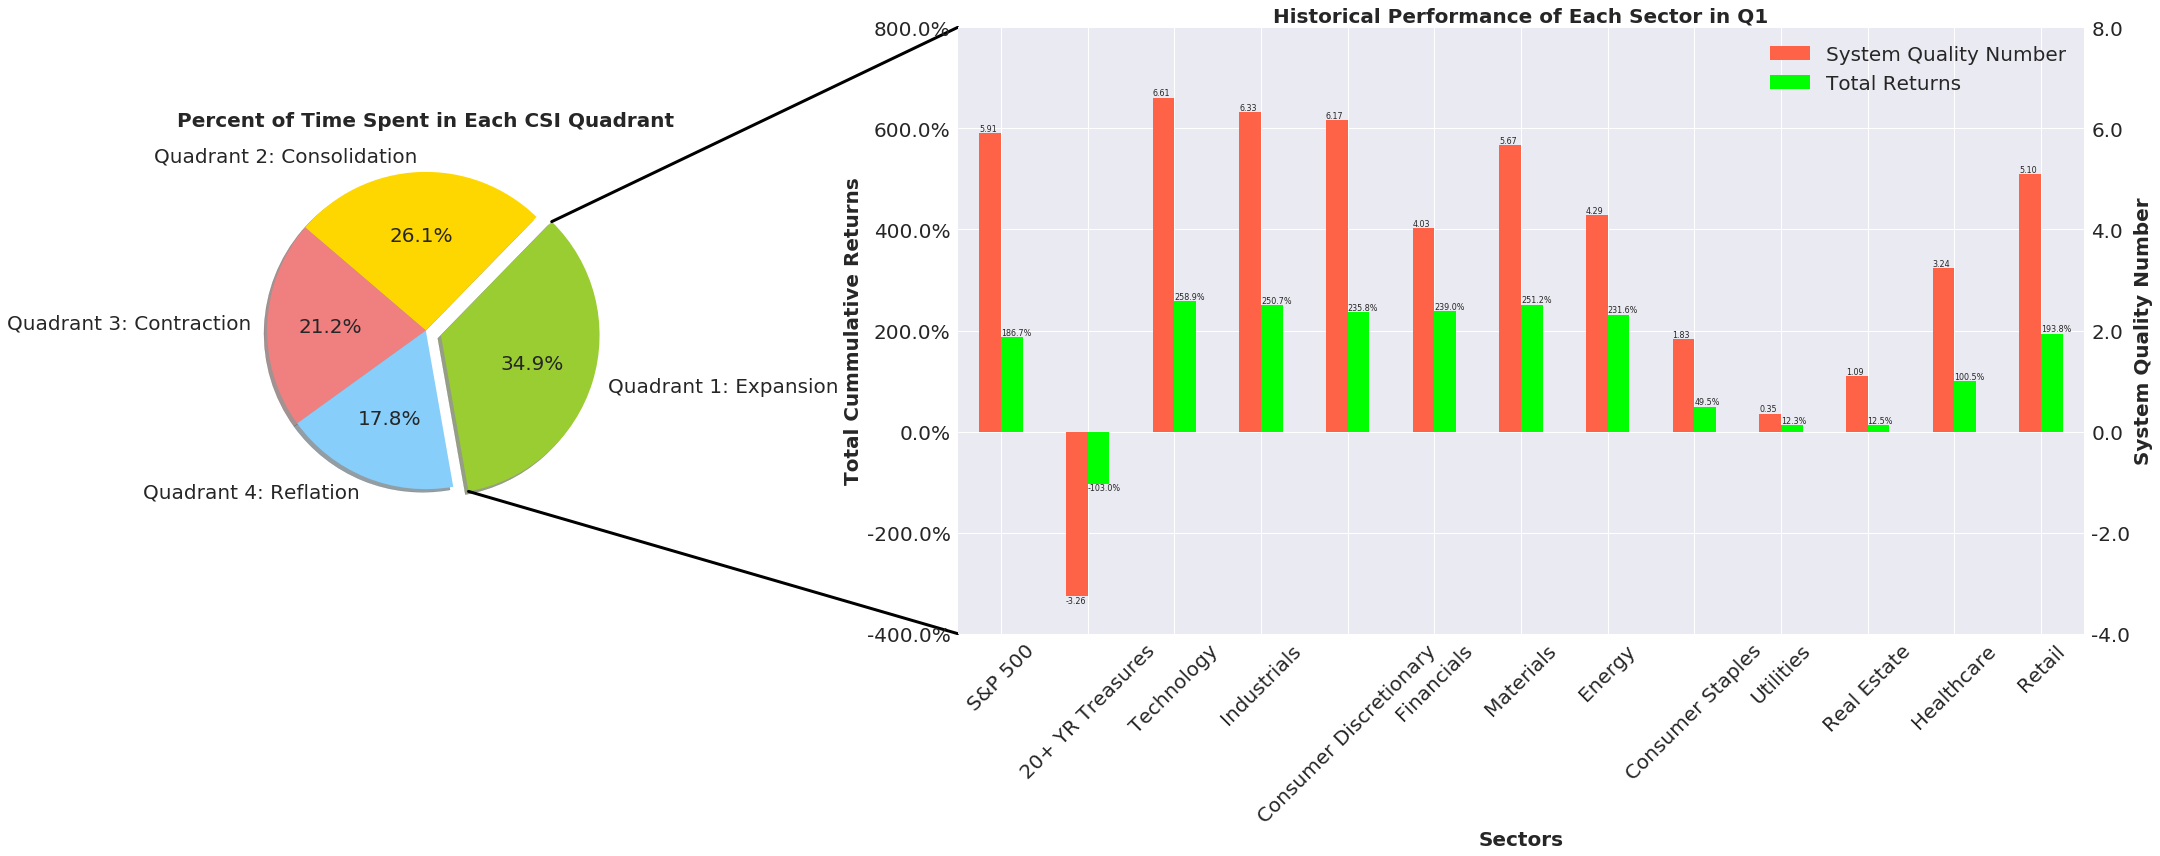

In [82]:
quadrant_to_graph = 'Q1'

with plt.style.context(("ggplot", "seaborn")):
    spec = gridspec.GridSpec(ncols=6, nrows=1)
    ################# Chart 1 ##############################################
    color_mapping = {"Q1":"yellowgreen", "Q2":"gold", "Q3":"lightcoral", "Q4":"lightskyblue"}
    
    fig = plt.figure(figsize=(30,12))
    ax1 = fig.add_subplot(spec[:2])
    # 1a - Calculate percentage of time in each quadrant
    pct_each_quadrant = {}
    csi_temp_no_zeros = csi_data[(csi_data['quadrant'] != '0')]

    for quad in quadrants:
        # Isolate for the given quadrant
        df_temp = csi_temp_no_zeros[csi_temp_no_zeros['quadrant'] == quad]

        # Calculate percentage for the given quadrant 
        pct_each_quadrant[quad] = round(len(df_temp) / len(csi_temp_no_zeros), 4)

    # Graph pie chart
    labels = 'Quadrant 1: Expansion', 'Quadrant 2: Consolidation', 'Quadrant 3: Contraction', 'Quadrant 4: Reflation'
    pct_list = list(pct_each_quadrant.values())
    colors = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue']

    # Define which slice is jutting out (and the angle the chart should be rotated)
    if quadrant_to_graph == 'Q1':
        explode = (.1, 0, 0, 0) 
        angle = 280
    elif quadrant_to_graph == 'Q2':
        explode = (0, .1, 0, 0)
        angle = 180
    elif quadrant_to_graph == 'Q3':
        explode = (0, 0, .1, 0)
        angle = 80
    elif quadrant_to_graph == 'Q4':
        explode = (0, 0, 0, .1)
        angle = 380

    # Plot
    plt.pie(pct_list, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,
            startangle=angle, textprops=dict(size=font_size))
    
    plt.title('Percent of Time Spent in Each CSI Quadrant', fontsize = font_size, fontweight="bold")
    
    ######################## Chart 2 #############################################
    ax2 = fig.add_subplot(spec[2:])
    df_tot_sqn.plot.bar(y=["%s_sqn"%quadrant_to_graph, "%s_total"%quadrant_to_graph], 
                        color=["tomato", "lime"],
                        ax=ax2)
    
    plt.legend(labels=["System Quality Number", "Total Returns"], 
               fontsize = font_size, 
               title = '', title_fontsize = font_size);
    
    for i, p in enumerate(ax2.patches):
        if i > 12:
            if p.get_height() > 0:
                ax2.text(p.get_x(), p.get_height(), "%.1f%%"%(p.get_height()), va="bottom", fontsize=8)
            else:
                ax2.text(p.get_x(), p.get_height(), "%.1f%%"%(p.get_height()), va="top", fontsize=8)
        else:
            if p.get_height() > 0:
                ax2.text(p.get_x(), p.get_height(), "%.2f"%(p.get_height()/100), va="bottom", ha="left", fontsize=8)
            else:
                ax2.text(p.get_x(), p.get_height(), "%.2f"%(p.get_height()/100), va="top", ha="left", fontsize=8)
    
    plt.xticks(range(df_tot_sqn.shape[0]), [etf_key[ticker] for ticker in df_tot_sqn.index], 
               rotation=45, fontsize=font_size)
    plt.xlabel("Sectors", fontsize=font_size, fontweight="bold")
    
    def percent(x, pos):
        return '%1.1f%%' % (x)
    
    ax2.set_ylim([-400, 800])
    ax2.yaxis.set_major_formatter(FuncFormatter(percent))
    plt.yticks(fontsize=font_size)
    ax2.set_ylabel("Total Cummulative Returns", fontsize=font_size, fontweight="bold")
    
    ax2_c = ax2.twinx()
    ax2_c.grid(None)
    ax2_c.set_yticklabels([val//100 for val in ax2.get_yticks()], fontsize=font_size)
    ax2_c.set_ylabel("System Quality Number", fontsize=font_size, fontweight="bold")
    fig.align_labels()
    fig.align_labels()
    ax2_c.set_ylim([-400, 800])
    
    
    plt.title("Historical Performance of Each Sector in %s"%quadrant_to_graph, fontsize=font_size, fontweight="bold")
    
    
    ######### Line 2 : Between bottom of Pie Chart and Lower Part of Bar Chart ###########################
    idx = 0 if quadrant_to_graph=="Q1" else 2 if quadrant_to_graph=="Q2" else 4 if quadrant_to_graph=="Q3" else 6
    theta1, theta2 = ax1.patches[idx].theta1, ax1.patches[idx].theta2
    center, r = ax1.patches[idx].center, ax1.patches[idx].r
    y1, y2 = ax2.get_ylim()
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]
    
    con1 = ConnectionPatch(xyA=(x, y), xyB=(-0.5, y1), coordsA="data",
                          coordsB="data", axesA=ax1, axesB=ax2)
    con1.set_color("black")
    ax1.add_artist(con1)
    con1.set_linewidth(3)

    ######### Line 1 : Between Start of Pie Chart and Upper Part of bar Chart ###########################
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]
    
    con2 = ConnectionPatch(xyA=(x, y), xyB=(-0.5, y2), coordsA="data",
                          coordsB="data", axesA=ax1, axesB=ax2)
    con2.set_color("black")
    ax1.add_artist(con2)
    con2.set_linewidth(3)

plt.tight_layout()
plt.savefig("graph2.png")

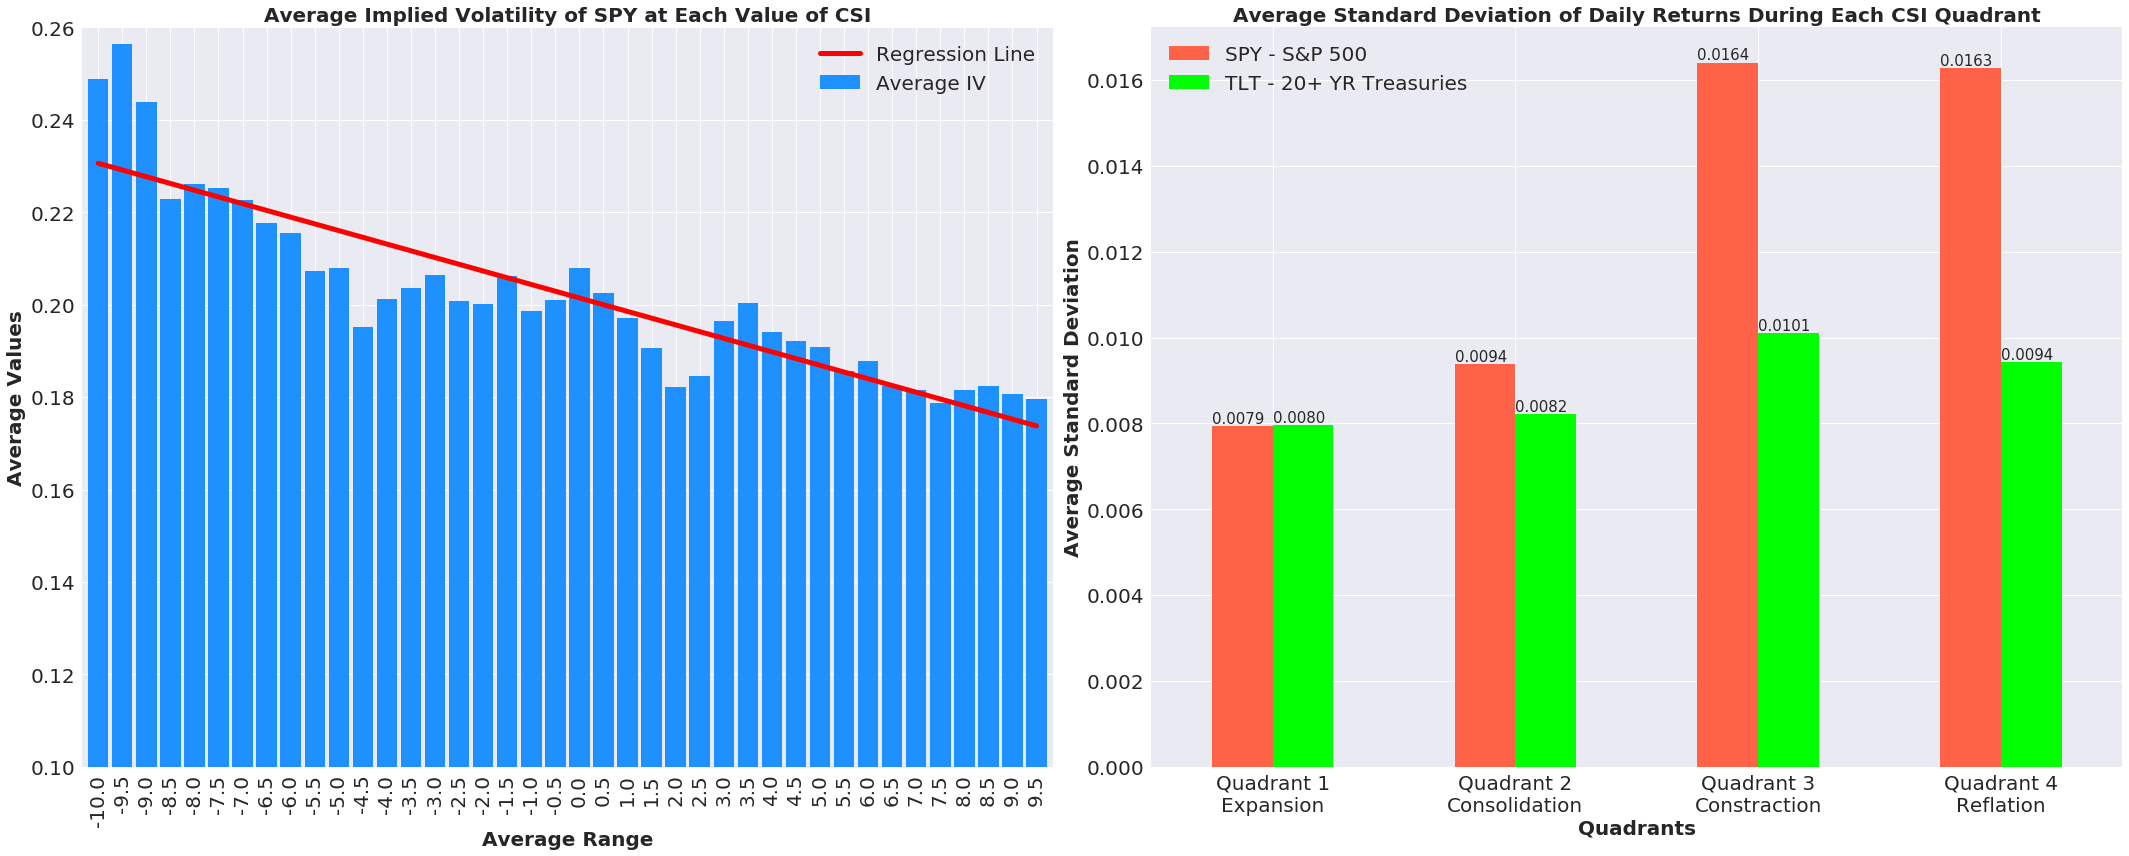

In [42]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(30,12))
    
    ##################### Chart 1 ########################################
    ax1 = fig.add_subplot(121)
    
    # Loop to find average IV for each range increment of CSI
    df_avg_iv = pd.DataFrame()

    for i in np.arange(-10, 10, .5):

        csi_temp = csi_data[csi_data['csi1'].between(i, i+.5)]
        mean = np.nanmean(csi_temp['SPY_IV'])
        # Save to df
        df_avg_iv.at[str(i), 'AVG_IV'] = mean




    # Calculate regression line??
    def best_fit_slope_and_intercept(xs,ys):
        m = (((np.nanmean(xs)*np.nanmean(ys)) - np.nanmean(xs*ys)) / ((np.nanmean(xs)*np.nanmean(xs)) - np.nanmean(xs*xs)))

        b = np.nanmean(ys) - m*np.nanmean(xs)

        return m, b

    xs = [float(x) for x in df_avg_iv.index]
    xs = np.array(xs, dtype=np.float64)

    xy = [float(x) for x in df_avg_iv['AVG_IV']]
    xy = np.array(xy, dtype=np.float64)

    m, b = best_fit_slope_and_intercept(xs, xy)
    ## Given m and b, how can the regression line be plotted on this graph? (y = mx+b)
    x1, y1 = xs[0], m* xs[0] + b
    x2, y2 = xs[-1], m* xs[-1] + b

    df_avg_iv.plot.bar(ylim= (.10, .26), width=0.85, ax=ax1, color="dodgerblue");
    #plt.plot([x1, x2], [y1,y2], color="red", linewidth=3)
    plt.plot([0, df_avg_iv.shape[0]-1], [y1,y2], color="red", linewidth=5, label="Regression")
    
    handles, labels = ax1.get_legend_handles_labels()
    plt.legend(handles=handles,labels = ["Regression Line", "Average IV"], fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.xlabel("Average Range", fontsize=font_size, fontweight="bold")
    plt.yticks(fontsize=font_size)
    plt.ylabel("Average Values", fontsize=font_size, fontweight="bold")
    plt.title("Average Implied Volatility of SPY at Each Value of CSI", fontsize=font_size, fontweight="bold")
    
    ############################ Chart 2 #############################################
    ax2 = fig.add_subplot(122)
    
    df_std_dev = pd.DataFrame()

    for quad in quadrants:       
        df_temp = csi_data[csi_data['quadrant'] == quad]

        # Calculate standard deviation for each of the indexes 
        for i in indexes:        
            std_dev = np.nanstd(df_temp[i])
            df_std_dev.at[i, quad] = std_dev

    # Graph
    df_std_dev.T.plot.bar(ax=ax2, color=["tomato", "lime"])
    plt.legend(labels=["SPY - S&P 500", "TLT - 20+ YR Treasuries"], 
               fontsize = font_size, 
               title = '', title_fontsize = font_size);
    
    plt.xlabel("Quadrants", fontsize=font_size, fontweight="bold")
    plt.xticks([0, 1, 2, 3], 
               ["Quadrant 1\nExpansion", "Quadrant 2\nConsolidation", "Quadrant 3\nConstraction", "Quadrant 4\nReflation"],
               rotation=360, 
               fontsize=font_size)
    plt.ylabel("Average Standard Deviation", fontsize=font_size, fontweight="bold")
    plt.yticks(fontsize=font_size)
    plt.title("Average Standard Deviation of Daily Returns During Each CSI Quadrant", fontsize=font_size, fontweight="bold")
    
    for p in ax2.patches:
        if p.get_height() > 0:
            ax2.text(p.get_x(), p.get_height(), "%.4f"%(p.get_height()), va="bottom", ha="left", fontsize=15)
        else:
            ax2.text(p.get_x(), p.get_height(), "%.1f"%(p.get_height()), va="top", ha="left", fontsize=15)
    
plt.tight_layout()
plt.savefig("graph3.png")